19_neda_mimfpt_(ML_GrdBC)

Engin Abdan

### Libraries

In [83]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, auc, roc_curve

from sklearn.tree import plot_tree

from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.style.use('classic')
sns.set_style("white")

### Data

In [27]:
stu = pd.read_excel("std_ins_ml_data.xlsx")

In [28]:
stu.head(1)

,Unnamed: 0,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,Flight_Mean,MI_Cat
0,0,20,19,10,16,13,16,17,22,1,95,Intrap


In [29]:
drop_list = ["Unnamed: 0", "Flight_Mean","MI_Cat"]
stu.drop(drop_list, inplace=True, axis=1)
stu.head(1)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not
0,20,19,10,16,13,16,17,22,1


### Data infos

In [30]:
stu.describe().T

,count,mean,std,min,25%,50%,75%,max
Ling_Int,100.0,17.72,3.068511,11.0,16.00,17.0,20.0,26.0
Math_Int,100.0,17.75,3.655285,10.0,15.00,17.0,19.0,33.0
Spa_Int,100.0,17.81,3.047420,10.0,15.75,17.5,20.0,26.0
Mus_Int,100.0,17.86,3.110815,10.0,16.00,17.5,20.0,26.0
Nat_Int,100.0,18.16,3.740901,10.0,15.75,18.0,20.0,33.0
Body_Int,100.0,17.20,2.670452,10.0,15.00,17.0,19.0,23.0
Interp_Int,100.0,17.78,2.865962,12.0,16.00,18.0,19.0,26.0
Intrap_Int,100.0,18.07,2.875374,13.0,16.00,18.0,20.0,26.0
Plt_Or_Not,100.0,0.58,0.496045,0.0,0.00,1.0,1.0,1.0


### Data Balance

In [31]:
stu["Plt_Or_Not"].value_counts()

1    58
0    42
Name: Plt_Or_Not, dtype: int64

### Skewness

In [32]:
x = stu.drop(columns=["Plt_Or_Not"]).columns
for i in x:
    if skew(stu[i]) >= -0.5 and skew(stu[i]) < 0.5:
        print(f"{i} \t: {skew(stu[i])} \t>>> Normal")
    elif skew(stu[i]) >= 0.5 and skew(stu[i]) < 1.0:
        print(f"{i} \t: {skew(stu[i])} \t>>> Moderate")
    elif skew(stu[i]) >= 1.0:
        print(f"{i} \t: {skew(stu[i])} \t>>> Skewed")              

Ling_Int 	: 0.12059345356069898 	>>> Normal
Math_Int 	: 1.3051123209475743 	>>> Skewed
Spa_Int 	: 0.2115483275849964 	>>> Normal
Mus_Int 	: 0.32126133203604673 	>>> Normal
Nat_Int 	: 0.8025455431140828 	>>> Moderate
Body_Int 	: 0.16184329645515394 	>>> Normal
Interp_Int 	: 0.22759596608919014 	>>> Normal
Intrap_Int 	: 0.12173869243645632 	>>> Normal


### Heatmap

In [33]:
# plt.figure(figsize=(20,10))
# sns.heatmap(stu.corr(), annot=True, cmap="BrBG")
# plt.tight_layout();

### Pairplot

In [34]:
#sns.pairplot(stu,hue="Plt_Or_Not");

### Corr With Plt_Or_Not

<AxesSubplot:>

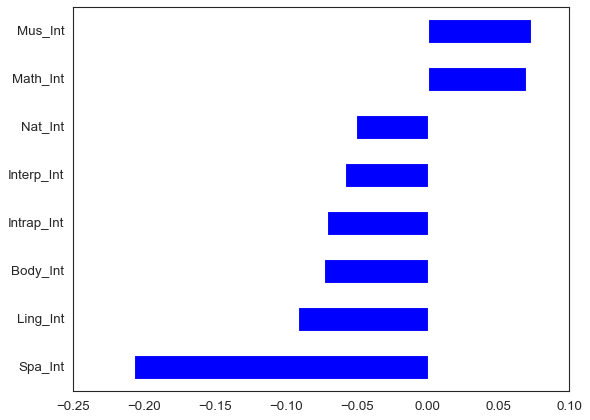

In [35]:
stu.corr()["Plt_Or_Not"].drop("Plt_Or_Not").sort_values().plot.barh()

### Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

x = stu.drop(columns=["Plt_Or_Not"], axis=1)
y = stu["Plt_Or_Not"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print("Train features shape : ", x_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", x_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (70, 8)
Train target shape   :  (70,)
Test features shape  :  (30, 8)
Test target shape    :  (30,)


### GrdC & Model

In [37]:
model = GradientBoostingClassifier(random_state=42)
model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [38]:
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

In [39]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[26  0]
 [ 0 44]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        44

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



In [40]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[ 4 12]
 [ 4 10]]
              precision    recall  f1-score   support

           0       0.50      0.25      0.33        16
           1       0.45      0.71      0.56        14

    accuracy                           0.47        30
   macro avg       0.48      0.48      0.44        30
weighted avg       0.48      0.47      0.44        30



### GrdC & CV

In [41]:
model = GradientBoostingClassifier(random_state=42)

scores = cross_validate(model,
                        x_train,
                        y_train,
                        scoring = ["accuracy",
                                   "precision_macro",
                                   "recall_macro",
                                   "f1_macro"],
                        cv = 10)
                        
df_scores = pd.DataFrame(scores, index = range(1, 11))
print(df_scores)
print("--------------------")
df_scores.mean()[2:]

    fit_time  score_time  test_accuracy  test_precision_macro  \
1   0.108809    0.007778       0.714286              0.357143   
2   0.125401    0.009999       0.428571              0.300000   
3   0.108440    0.006999       0.857143              0.916667   
4   0.085995    0.004000       0.714286              0.650000   
5   0.065998    0.005263       0.428571              0.416667   
6   0.077974    0.039999       0.571429              0.583333   
7   0.138004    0.010000       0.857143              0.900000   
8   0.092988    0.007006       0.714286              0.800000   
9   0.096999    0.008002       0.714286              0.833333   
10  0.081994    0.005000       0.857143              0.900000   

    test_recall_macro  test_f1_macro  
1            0.500000       0.416667  
2            0.300000       0.300000  
3            0.750000       0.787879  
4            0.650000       0.650000  
5            0.416667       0.416667  
6            0.583333       0.571429  
7          

test_accuracy           0.685714
test_precision_macro    0.665714
test_recall_macro       0.628333
test_f1_macro           0.618986
dtype: float64

### GrdC & GridSearchCV

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [69]:
param_grid = {"learning_rate":[0.003, 0.005, 0.006],
              "n_estimators":[200, 300, 400],
              "subsample":[0.5, 1, 2],
              "max_depth":[2, 3, 4],
              "max_features":[None, 2, 3]}

In [70]:
model = GradientBoostingClassifier(random_state=42)

grid_model = GridSearchCV(model,
                          param_grid,
                          scoring = "accuracy",
                          n_jobs = -1,
                          verbose = 2)

In [71]:
grid_model.fit(x_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.003, 0.005, 0.006],
                         'max_depth': [2, 3, 4], 'max_features': [None, 2, 3],
                         'n_estimators': [200, 300, 400],
                         'subsample': [0.5, 1, 2]},
             scoring='accuracy', verbose=2)

In [72]:
grid_model.best_estimator_

GradientBoostingClassifier(learning_rate=0.005, max_features=2,
                           n_estimators=300, random_state=42, subsample=1)

In [73]:
grid_model.best_params_

{'learning_rate': 0.005,
 'max_depth': 3,
 'max_features': 2,
 'n_estimators': 300,
 'subsample': 1}

In [74]:
y_test_pred = grid_model.predict(x_test)
y_train_pred = grid_model.predict(x_train)

In [75]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[17  9]
 [ 0 44]]
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        26
           1       0.83      1.00      0.91        44

    accuracy                           0.87        70
   macro avg       0.92      0.83      0.85        70
weighted avg       0.89      0.87      0.86        70



In [76]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[ 2 14]
 [ 4 10]]
              precision    recall  f1-score   support

           0       0.33      0.12      0.18        16
           1       0.42      0.71      0.53        14

    accuracy                           0.40        30
   macro avg       0.38      0.42      0.35        30
weighted avg       0.37      0.40      0.34        30



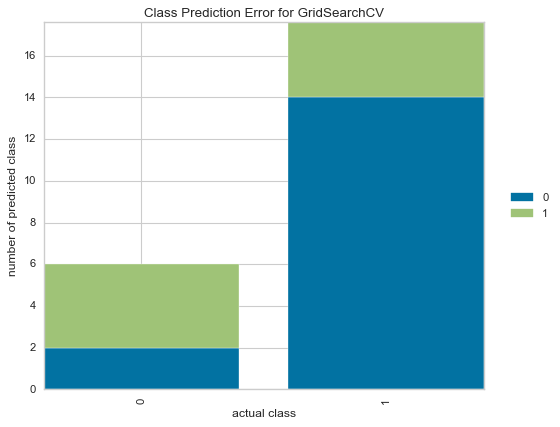

In [77]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(grid_model)

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.poof();

### Best Number of "n_estimators"

In [84]:
error_rates = []

for n in range(1,500):
    model = GradientBoostingClassifier(learning_rate = 0.005,
                                       max_depth = 3,
                                       max_features = 2,
                                       n_estimators = n,
                                       subsample = 1)
    model.fit(x_train,y_train)
    test_preds = model.predict(x_test)
    err = 1 - accuracy_score(y_test, test_preds)
    
    error_rates.append(err)

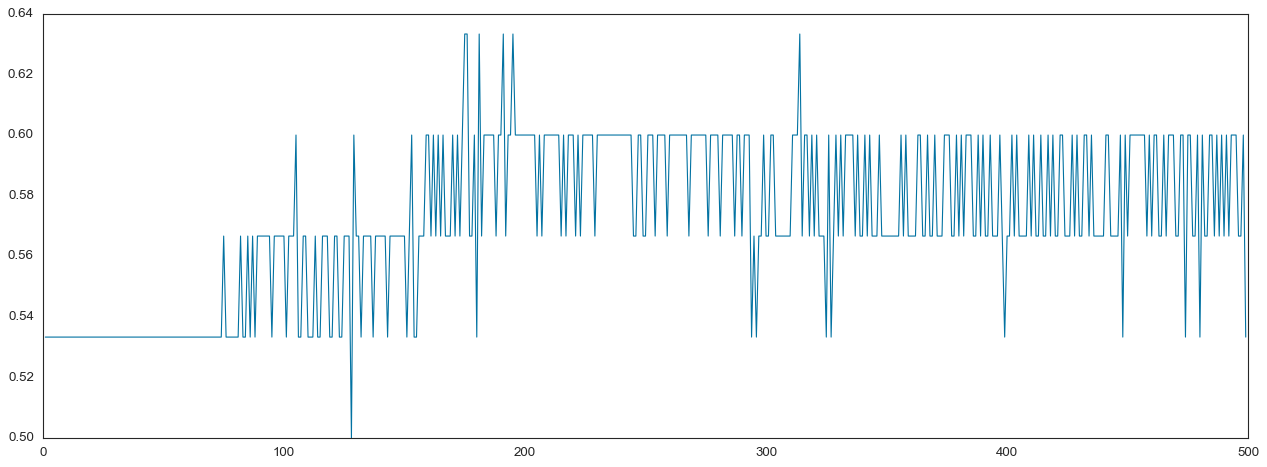

In [85]:
plt.figure(figsize=(16,6))
plt.plot(range(1,500), error_rates)
plt.tight_layout();

### Feature Importances

In [90]:
model = GradientBoostingClassifier(learning_rate = 0.005,
                                   max_depth = 3,
                                   max_features = 2,
                                   n_estimators = n,
                                   subsample = 1)
model.fit(x_train,y_train)

Feat_Imp = pd.DataFrame(index = x.columns,
                        data = model.feature_importances_, 
                        columns = ["Feat_Imp"]).sort_values("Feat_Imp")
Feat_Imp

,Feat_Imp
Mus_Int,0.065038
Spa_Int,0.078339
Intrap_Int,0.093376
Interp_Int,0.098103
Ling_Int,0.105926
Nat_Int,0.164610
Body_Int,0.164717
Math_Int,0.229892


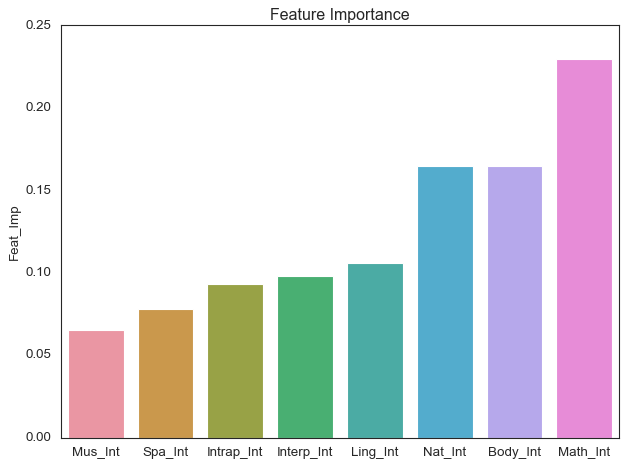

In [91]:
sns.barplot(x=Feat_Imp.index, y=Feat_Imp["Feat_Imp"])
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

### Best Threshold

In [93]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, precision_recall_curve, average_precision_score

In [94]:
from sklearn.ensemble import GradientBoostingClassifier 

model = GradientBoostingClassifier(learning_rate = 0.005,
                                   max_depth = 3,
                                   max_features = 2,
                                   n_estimators = n,
                                   subsample = 1)
model.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.005, max_features=2,
                           n_estimators=499, subsample=1)

In [95]:
y_test_pred = model.predict(x_test)
y_test_pred_proba = model.predict_proba(x_test)

In [96]:
test_data = pd.concat([x_test, y_test], axis=1)
test_data["pred_proba"] = y_test_pred_proba[:,1]
test_data["pred1"] = y_test_pred
test_data.head(5)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,pred_proba,pred1
83,22,19,13,18,21,18,15,19,1,0.880520,1
53,17,13,18,13,13,22,23,20,1,0.419782,0
70,21,16,16,16,19,18,18,20,1,0.799629,1
45,14,14,15,26,20,13,20,14,1,0.770432,1
44,16,17,16,17,21,19,18,20,0,0.795751,1


In [97]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[ 4 12]
 [ 5  9]]
              precision    recall  f1-score   support

           0       0.44      0.25      0.32        16
           1       0.43      0.64      0.51        14

    accuracy                           0.43        30
   macro avg       0.44      0.45      0.42        30
weighted avg       0.44      0.43      0.41        30



In [98]:
y_train_pred_proba = model.predict_proba(x_train)
roc_auc_score(y_train, y_train_pred_proba[:,1])

fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_pred_proba[:,1])

optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
optimal_threshold_rac

0.6692983271772112

In [99]:
test_data["pred2"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold_rac else 0)
test_data.head(5)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,pred_proba,pred1,pred2
83,22,19,13,18,21,18,15,19,1,0.880520,1,1
53,17,13,18,13,13,22,23,20,1,0.419782,0,0
70,21,16,16,16,19,18,18,20,1,0.799629,1,1
45,14,14,15,26,20,13,20,14,1,0.770432,1,1
44,16,17,16,17,21,19,18,20,0,0.795751,1,1


In [100]:
y_pred2 = test_data["pred2"]
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[7 9]
 [6 8]]
              precision    recall  f1-score   support

           0       0.54      0.44      0.48        16
           1       0.47      0.57      0.52        14

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.50        30
weighted avg       0.51      0.50      0.50        30



In [101]:
y_train_pred_proba = model.predict_proba(x_train)
average_precision_score(y_train, y_train_pred_proba[:,1])

precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred_proba[:,1])

optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold_prc = thresholds[optimal_idx]
optimal_threshold_prc

0.6692983271772112

In [102]:
test_data["pred3"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold_prc else 0)
test_data.head()

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,pred_proba,pred1,pred2,pred3
83,22,19,13,18,21,18,15,19,1,0.880520,1,1,1
53,17,13,18,13,13,22,23,20,1,0.419782,0,0,0
70,21,16,16,16,19,18,18,20,1,0.799629,1,1,1
45,14,14,15,26,20,13,20,14,1,0.770432,1,1,1
44,16,17,16,17,21,19,18,20,0,0.795751,1,1,1


In [103]:
y_pred3 = test_data["pred3"]
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[7 9]
 [6 8]]
              precision    recall  f1-score   support

           0       0.54      0.44      0.48        16
           1       0.47      0.57      0.52        14

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.50        30
weighted avg       0.51      0.50      0.50        30



### Prediction

In [104]:
model = GradientBoostingClassifier(learning_rate = 0.005,
                                   max_depth = 3,
                                   max_features = 2,
                                   n_estimators = n,
                                   subsample = 1)
model.fit(x, y)

GradientBoostingClassifier(learning_rate=0.005, max_features=2,
                           n_estimators=499, subsample=1)

In [105]:
columns_name = x.columns

In [106]:
pred = [[35, 36, 34, 37, 15, 17, 19, 21]]
pred_data = pd.DataFrame(data=pred, columns=columns_name)
pred_data

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int
0,35,36,34,37,15,17,19,21


In [107]:
print("optimal_threshold_rac:", optimal_threshold_rac)
print()
print("optimal_threshold_prc:", optimal_threshold_prc)

optimal_threshold_rac: 0.6692983271772112

optimal_threshold_prc: 0.6692983271772112


In [108]:
predictions1 = model.predict(pred_data)[0]
predictions1

0

In [109]:
predictions_proba = model.predict_proba(pred_data)
print(predictions_proba[0])
print(predictions_proba[0][0])
print(predictions_proba[0][1])

[0.63064804 0.36935196]
0.6306480418046018
0.36935195819539823


In [110]:
predictions2 = [1 if predictions_proba[0][1] >= optimal_threshold_rac else 0][0] 
predictions2

0

In [111]:
pred_data["pred1"] = predictions1
pred_data["pred_proba"] = predictions_proba[0][0]
pred_data["pred2"] = predictions2
pred_data

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,pred1,pred_proba,pred2
0,35,36,34,37,15,17,19,21,0,0.630648,0


In [112]:
MI_Cat = columns_name[np.argmax(pred_data)]
MI_Score = max(pred[0])
Best_Threshold = optimal_threshold_rac

if predictions_proba[0][1] >= Best_Threshold:
    print(f"MI_Cat\t\t\t: {MI_Cat}\nMI_Score\t\t: {MI_Score}\nBest_Threshold\t\t: {Best_Threshold}\nPredictions_Proba\t: {predictions_proba[0][1]}\nPrediction\t\t: 1\nResult\t\t\t: Pilot")
if predictions_proba[0][1] < Best_Threshold:
    print(f"MI_Cat\t\t\t: {MI_Cat}\nMI_Score\t\t: {MI_Score}\nBest_Threshold\t\t: {Best_Threshold}\nPredictions_Proba\t: {predictions_proba[0][1]}\nPrediction\t\t: 0\nResult\t\t\t: Not Pilot")

MI_Cat			: Mus_Int
MI_Score		: 37
Best_Threshold		: 0.6692983271772112
Predictions_Proba	: 0.36935195819539823
Prediction		: 0
Result			: Not Pilot
